In [1]:
import pandas as pd

In [2]:
df_p = pd.read_csv('C:/Users/Пользователь/Desktop/Python/Pandas_ данные для курса/Products.csv', sep = ';')
df_c = pd.read_csv('C:/Users/Пользователь/Desktop/Python/Pandas_ данные для курса/Customers.csv', sep = ';')
df_o = pd.read_csv('C:/Users/Пользователь/Desktop/Python/Pandas_ данные для курса/Orders.csv', sep = ';')
df_od = pd.read_csv('C:/Users/Пользователь/Desktop/Python/Pandas_ данные для курса/Order_details.csv', sep = ';')
df_e = pd.read_excel('C:/Users/Пользователь/Desktop/Python/Pandas_ данные для курса/Employees.xlsx')

## Гистограмма

In [ ]:
df_p

array([[<Axes: title={'center': 'ProductID'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CategoryID'}>, <Axes: >]], dtype=object)

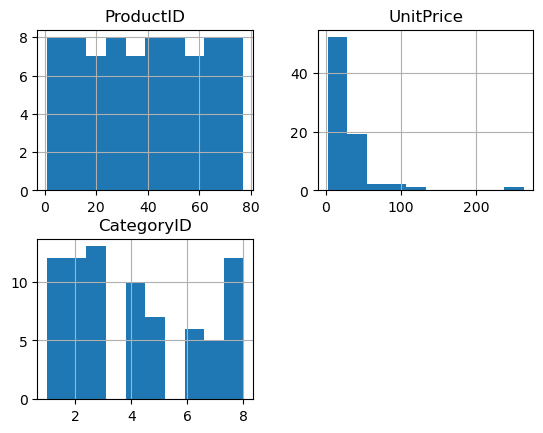

In [4]:
# Гистограммы
df_p.hist()

<Axes: >

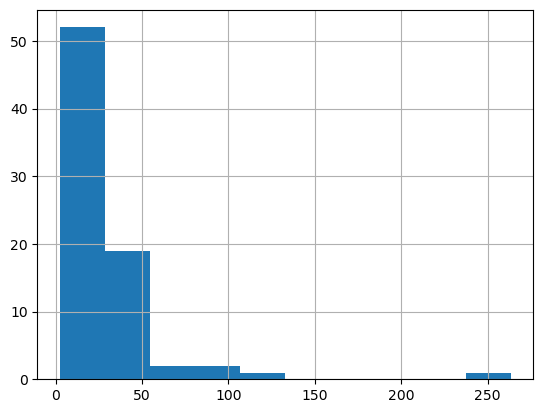

In [5]:
df_p['UnitPrice'].hist()

In [7]:
df_p['bins'] = pd.cut(df_p['UnitPrice'], 10)

In [8]:
df_p.groupby('bins').ProductID.count()

bins
(2.239, 28.6]     52
(28.6, 54.7]      19
(54.7, 80.8]       2
(80.8, 106.9]      2
(106.9, 133.0]     1
(133.0, 159.1]     0
(159.1, 185.2]     0
(185.2, 211.3]     0
(211.3, 237.4]     0
(237.4, 263.5]     1
Name: ProductID, dtype: int64

<Axes: >

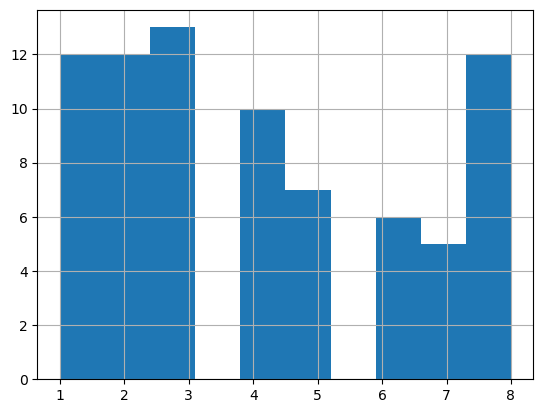

In [9]:
df_p['CategoryID'].hist()

In [10]:
df_p.groupby('CategoryID').ProductID.count()

CategoryID
1    12
2    12
3    13
4    10
5     7
6     6
7     5
8    12
Name: ProductID, dtype: int64

<Axes: >

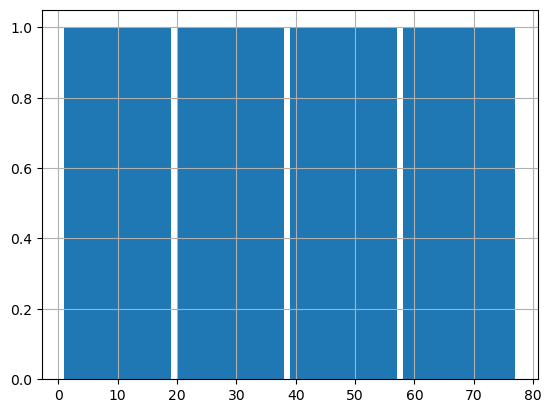

In [13]:
# Неинформативная гистограмма
df_p['ProductID'].hist(bins = 80)

<Axes: >

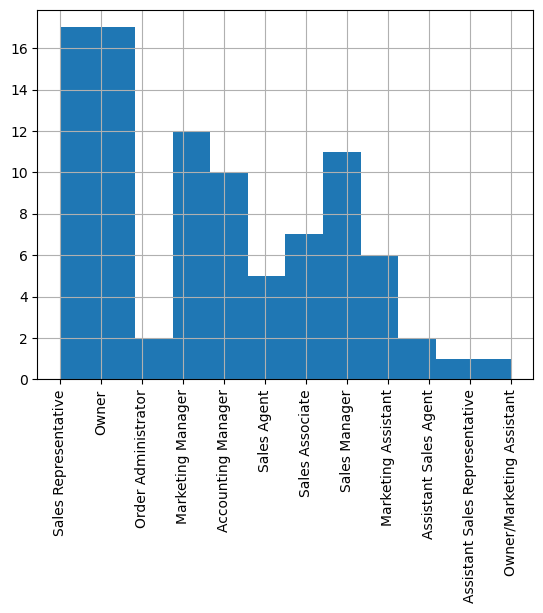

In [16]:
# Вывести кол-во сотрудников по каждой профессии
df_c['ContactTitle'].hist(xrot = 'vertical', bins = 12)

In [17]:
# Кол-во клиентов в разрезе должностей по сути тоже самое
df_c.groupby('ContactTitle').CustomerID.count()

ContactTitle
Accounting Manager                10
Assistant Sales Agent              2
Assistant Sales Representative     1
Marketing Assistant                6
Marketing Manager                 12
Order Administrator                2
Owner                             17
Owner/Marketing Assistant          1
Sales Agent                        5
Sales Associate                    7
Sales Manager                     11
Sales Representative              17
Name: CustomerID, dtype: int64

Количество клиентов в разрезе должностей можно визуализировать с помощью метода .plot(), передав в него параметр kind= 'bar' (тип диаграммы - столбчатая). Мы получим ту же гистограмму.

<Axes: xlabel='ContactTitle'>

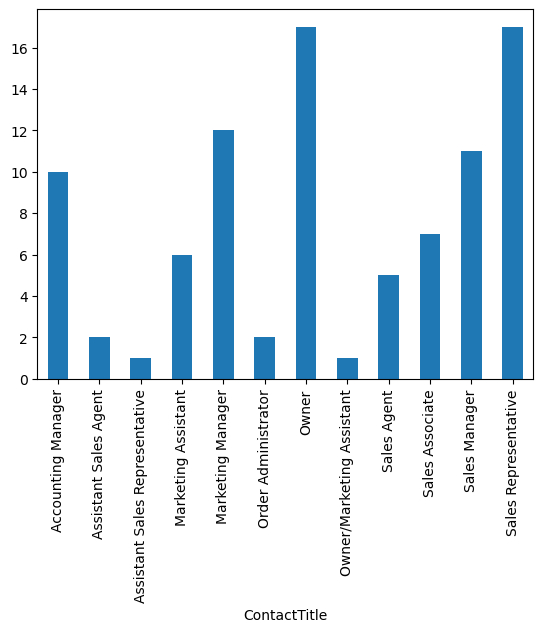

In [18]:
df_c.groupby('ContactTitle').CustomerID.count().plot(kind= 'bar') 

Также у метода .plot() среди типов диаграмм есть гистограмма kind= 'hist'. Построить гистограмму можно и так:



<Axes: ylabel='Frequency'>

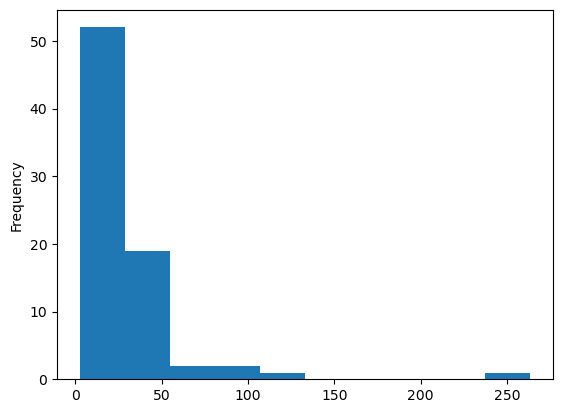

In [19]:
df_p['UnitPrice'].plot(kind ='hist')

Но если с помощью метода .hist() можно строить гистограммы для любых типов данных, то метод .plot(kind= 'hist') работает только числовыми типами данных.



<Axes: >

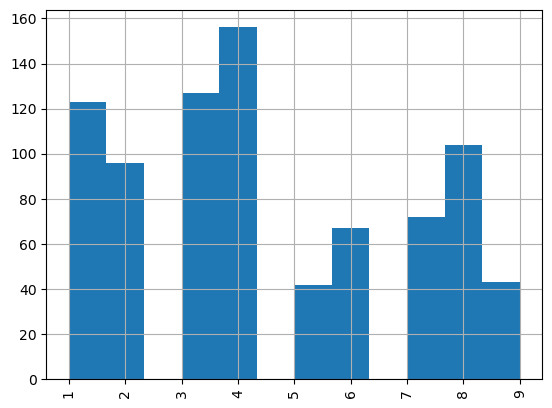

In [21]:
df_o['EmployeeID'].hist(xrot = 'vertical', bins = 12)

## Столбчатая диаграмма

In [22]:
# Меняем тип данных с object на datetime64[ns]
df_o['OrderDate'] = df_o['OrderDate'].astype('datetime64[ns]')
df_o['RequiredDate'] = df_o['RequiredDate'].astype('datetime64[ns]')
df_o['ShippedDate'] = df_o['ShippedDate'].astype('datetime64[ns]')

In [23]:
# Извлекаем год, месяц и неделю
df_o['year'] = df_o['OrderDate'].dt.year 
df_o['month'] = df_o['OrderDate'].dt.month 
df_o['week'] = df_o['OrderDate'].dt.isocalendar().week 

In [25]:
# Считаем выручку, очищенную от скидки для каждой строки
df_od['revenue'] = df_od['UnitPrice']*df_od['Quantity']*(1-df_od['Discount'])
df_od_final = df_od.groupby('OrderID').revenue.sum().reset_index()

In [26]:
df_o = df_o.merge(df_od_final)

<Axes: xlabel='year'>

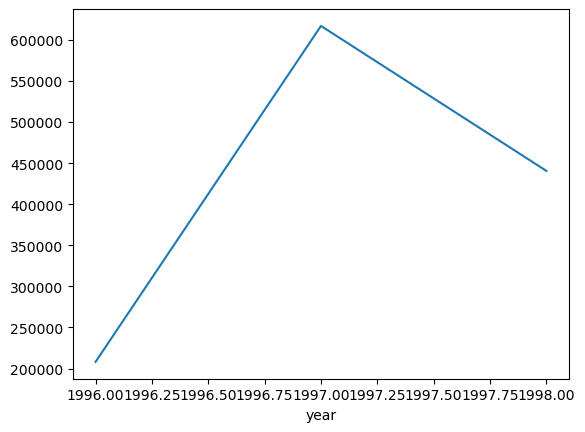

In [29]:
# Выручка по каждому году
df_o.groupby('year').revenue.sum().plot()

<Axes: xlabel='year'>

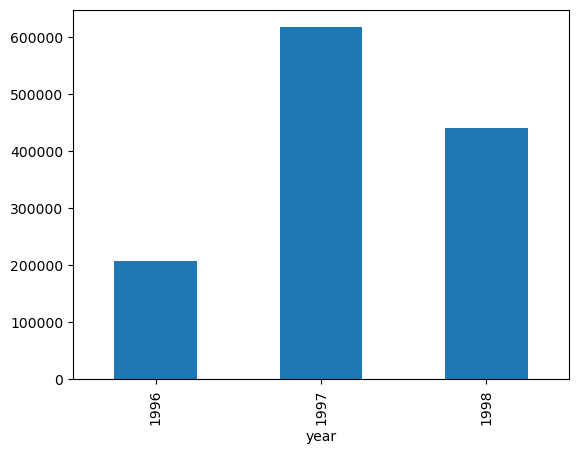

In [30]:
# Выручка по каждому году
df_o.groupby('year').revenue.sum().plot(kind = 'bar')

<Axes: xlabel='year,month'>

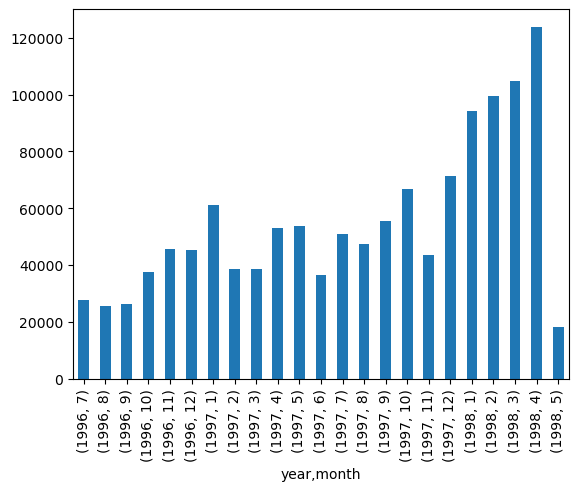

In [31]:
# Выручка по каждому году и месяцу
df_o.groupby(['year','month']).revenue.sum().plot(kind = 'bar')

In [36]:
# Оборот - фильтрация по году и группировака по месяцам
df_o_1997 = df_o[df_o['year'] == 1997].groupby('month').revenue.sum().reset_index()
df_o_1998 = df_o[df_o['year'] == 1998].groupby('month').revenue.sum().reset_index()

In [37]:
df_o_1997

,month,revenue
0,1,61258.0700
1,2,38483.6350
2,3,38547.2200
3,4,53032.9525
4,5,53781.2900
5,6,36362.8025
6,7,51020.8575
7,8,47287.6700
8,9,55629.2425
9,10,66749.2260


In [38]:
df_o_1998

,month,revenue
0,1,94222.1105
1,2,99415.2875
2,3,104854.1550
3,4,123798.6825
4,5,18333.6305


In [39]:
# Переименовать
df_o_1997 = df_o_1997.rename(columns = {'revenue':'rev_1997'})
df_o_1998 = df_o_1998.rename(columns = {'revenue':'rev_1998'})

In [42]:
df_o_final = df_o_1997.merge(df_o_1998, how = 'left')

In [43]:
df_o_final

,month,rev_1997,rev_1998
0,1,61258.0700,94222.1105
1,2,38483.6350,99415.2875
2,3,38547.2200,104854.1550
3,4,53032.9525,123798.6825
4,5,53781.2900,18333.6305
5,6,36362.8025,NaN
6,7,51020.8575,NaN
7,8,47287.6700,NaN
8,9,55629.2425,NaN
9,10,66749.2260,NaN


<Axes: xlabel='month'>

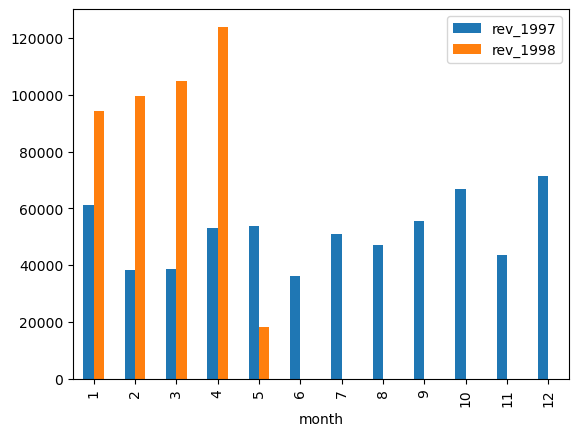

In [45]:
df_o_final.plot(kind = 'bar', x = 'month')

Посчитайте отдельно по 1997 и по 1998 году чистую выручку в разрезе недель. Запишите результаты в новые датафреймы. Далее объедините их в общий датафрейм, в котором будет 3 столбца: номер недели, чистая выручка 1997 год, чистая выручка 1998 год. Постройте столбчатую диаграмму и выберите номера недель, на которых выручка в 1997 году была выше чем в 1998.

In [46]:
# Оборот - фильтрация по году и группировака по неделям
df_o_1997 = df_o[df_o['year'] == 1997].groupby('week').revenue.sum().reset_index()
df_o_1998 = df_o[df_o['year'] == 1998].groupby('week').revenue.sum().reset_index()

In [47]:
df_o_1997

,week,revenue
0,1,24765.4375
1,2,7135.1800
2,3,16508.4300
3,4,15624.0700
4,5,9899.0250
5,6,5723.4400
6,7,11355.8150
7,8,9313.7800
8,9,12090.6000
9,10,6165.3800


In [48]:
df_o_1998

,week,revenue
0,1,4282.8000
1,2,29303.6050
2,3,18357.9540
3,4,21812.0640
4,5,20465.6875
5,6,27409.8900
6,7,13385.6350
7,8,41710.5325
8,9,16909.2300
9,10,17454.9200


In [49]:
# Переименовать
df_o_1997 = df_o_1997.rename(columns = {'revenue':'rev_1997'})
df_o_1998 = df_o_1998.rename(columns = {'revenue':'rev_1998'})

In [51]:
df_o_week = df_o_1997.merge(df_o_1998, how = 'inner')

In [52]:
df_o_week

,week,rev_1997,rev_1998
0,1,24765.4375,4282.8000
1,2,7135.1800,29303.6050
2,3,16508.4300,18357.9540
3,4,15624.0700,21812.0640
4,5,9899.0250,20465.6875
5,6,5723.4400,27409.8900
6,7,11355.8150,13385.6350
7,8,9313.7800,41710.5325
8,9,12090.6000,16909.2300
9,10,6165.3800,17454.9200


<Axes: xlabel='week'>

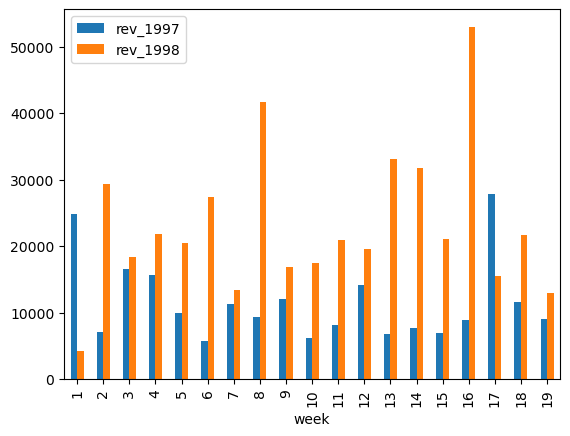

In [53]:
df_o_week.plot(kind = 'bar', x = 'week')

In [54]:
df_od_final.head()

,OrderID,revenue
0,10248,440.00
1,10249,1863.40
2,10250,1552.60
3,10251,654.06
4,10252,3597.90


In [55]:
# Присоединим df_od_final к df_o 
df_o = df_o.merge(df_od_final)

In [56]:
df_o

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight,year,month,week,revenue
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,32.38,1996,7,27,440.0000
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,11.61,1996,7,27,1863.4000
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,65.83,1996,7,28,1552.6000
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,41.34,1996,7,28,654.0600
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,51.30,1996,7,28,3597.9000
...,...,...,...,...,...,...,...,...,...,...,...
825,11073,PERIC,2,1998-05-05,1998-06-02,NaT,24.95,1998,5,19,300.0000
826,11074,SIMOB,7,1998-05-06,1998-06-03,NaT,18.44,1998,5,19,232.0850
827,11075,RICSU,8,1998-05-06,1998-06-03,NaT,6.19,1998,5,19,498.1000
828,11076,BONAP,4,1998-05-06,1998-06-03,NaT,38.28,1998,5,19,792.7500


<Axes: xlabel='revenue', ylabel='Freight'>

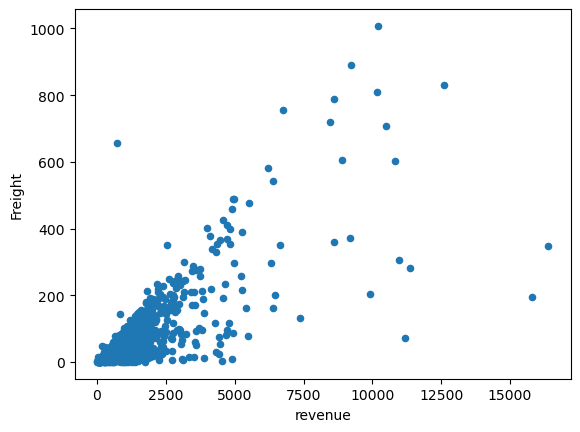

In [57]:
# Чем выше вес заказа, тем больше выручка?
df_o.plot(kind = 'scatter', x = 'revenue', y = 'Freight')

<Axes: >

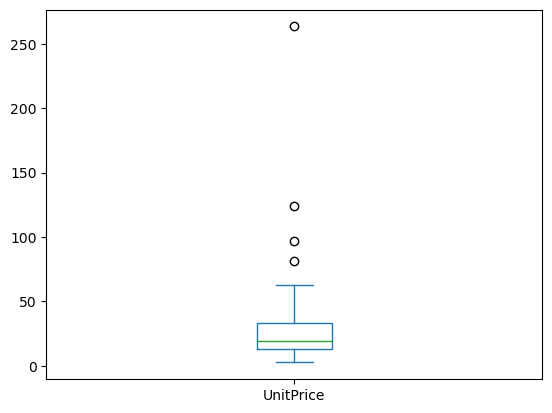

In [58]:
df_p['UnitPrice'].plot(kind = 'box')

In [59]:
# Стоимость товара на 4 дня
df_p['bins'] = pd.qcut(df_p['UnitPrice'], 4)

In [60]:
df_p.groupby('bins').ProductID.count()

bins
(2.499, 13.25]    20
(13.25, 19.5]     19
(19.5, 33.25]     19
(33.25, 263.5]    19
Name: ProductID, dtype: int64

In [61]:
df_p['UnitPrice'].describe()

count     77.000000
mean      28.866364
std       33.815111
min        2.500000
25%       13.250000
50%       19.500000
75%       33.250000
max      263.500000
Name: UnitPrice, dtype: float64

Посчитайте фактическую скидку и чистую выручку для каждой строки в датафрейме df_od. Затем сгруппируйте чистую выручку и фактическую скидку для каждого заказа. Далее постройте scatter plot, где по вертикали расположится фактическая скидка, а по горизонтали - чистая выручка.

In [62]:
# фактическая скидка 
df_od['DiscountFact'] = df_od['UnitPrice'] * df_od['Quantity'] * df_od['Discount']

<Axes: xlabel='revenue', ylabel='DiscountFact'>

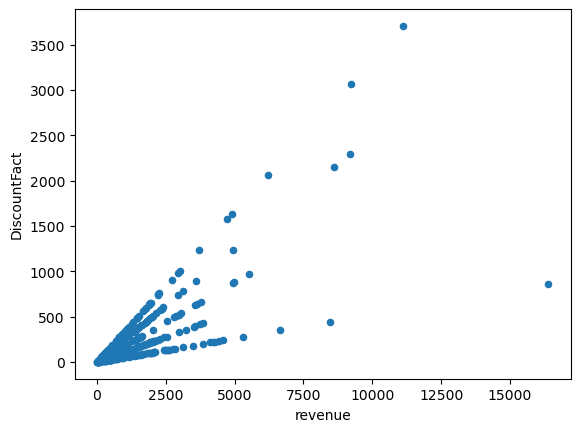

In [65]:
df_od[df_od['DiscountFact'] != 0].groupby('OrderID').agg({'DiscountFact':'sum', 'revenue':'sum'}).reset_index().plot(x='revenue', y='DiscountFact', kind='scatter')

Скорее всего есть зависимость: чем больше чистая выручка по заказу, тем больше размер фактической скидки

Для каждого клиента CustomerID посчитайте количество совершенных заказов. Затем проанализируйте какое количество заказов совершают клиенты, построив box plot

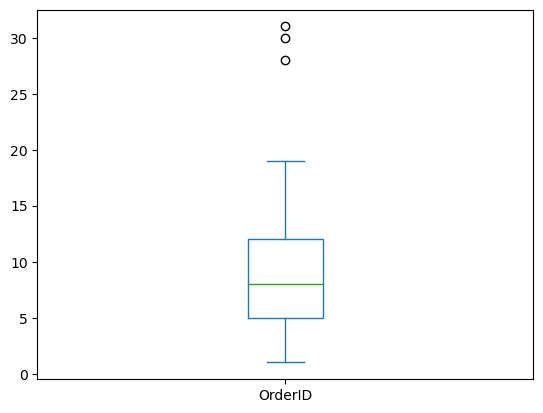

In [69]:
df_1 = df_o.groupby(['CustomerID'])['OrderID'].count().plot(kind = 'box')